<a href="https://colab.research.google.com/github/sysbio-unam/practicas-computacionales-Python/blob/main/michaelis-menten-y-hill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [21]:
def velocidad_producto(S):
    return vmax * S / (Km + S)

In [69]:
# simular 
Km = 80
vmax = 2
# valores de sustrato 
S = np.linspace(0, 500, 100)

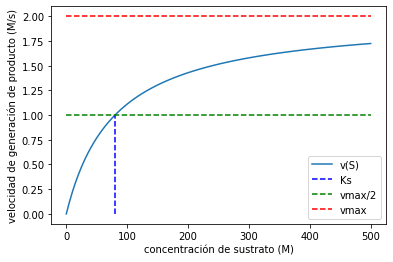

In [70]:
plt.plot(S, velocidad_producto(S))
plt.plot([Km, Km], [0, 1], "b--")
plt.plot(S, np.ones_like(S) * vmax / 2, "g--")
plt.plot(S, np.ones_like(S)*vmax, "r--")
plt.xlabel("concentración de sustrato (M)")
plt.ylabel("velocidad de generación de producto (M/s)")
plt.legend(["v(S)", "Ks", "vmax/2", "vmax"])

## Simulación interactiva la constante de afinidad, $K_M$

In [74]:
def graficar_velocidad():
    S = np.linspace(0, 500, 100)
    plt.plot(S, velocidad_producto(S))
    plt.plot([Km, Km], [0, 1], "b--")
    plt.plot(S, np.ones_like(S) * vmax / 2, "g--")
    plt.plot(S, np.ones_like(S)*vmax, "r--")
    plt.xlabel("concentración de sustrato (M)")
    plt.ylabel("velocidad de generación de producto (M/s)")
    plt.legend(["v(S)", "Ks", "vmax/2", "vmax"])

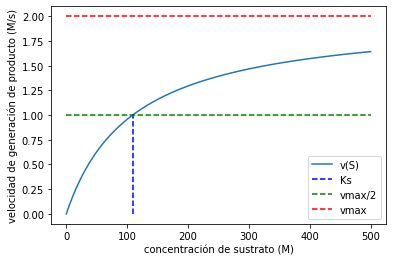

In [75]:
graficar_velocidad()

In [90]:
from ipywidgets import interact

def sim(aslider = 80):
    global Km
    Km = aslider
    graficar_velocidad()
    
interact(sim, aslider = (50, 200, 1))

interactive(children=(IntSlider(value=80, description='aslider', max=200, min=50), Output()), _dom_classes=('w…

<function __main__.sim>

## 5. Análisis dinámico (integración numérica)



In [77]:
# establecer modelo 
def modelo(s, t):
    # variables de estado
    S = s[0]
    ES = s[1]
    E = s[2]
    P = s[3]

    # balance para S
    dSdt = -k1*E*S + kin*ES
    # balance para el comlejo ES
    dESdt = k1*E*S - kin*ES - k2*ES
    # balance para E
    dEdt = - dESdt
    # balance para P 
    dPdt = k2*ES
    return [dSdt, dESdt, dEdt, dPdt]

In [78]:
# establecer parámetros 
k1, kin, k2 = 0.05, 0.04, 0.5
# condiciones iniciales 
s =[10, 0, 1, 0]
# tiempo de integración
time = np.linspace(0, 150, 151)

In [79]:
out = odeint(modelo, s, time)
S = out[:, 0]
ES = out[:, 1]
E = out[:, 2]
P = out[:, 3]

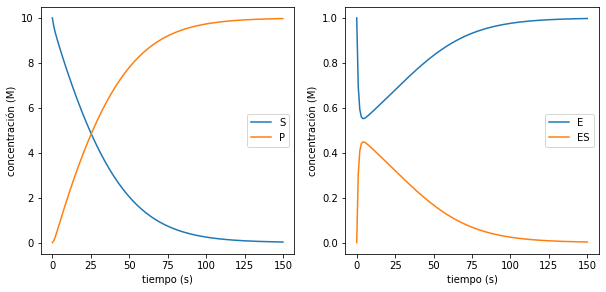

In [80]:
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
plt.plot(time, S, time, P)
plt.xlabel("tiempo (s)")
plt.ylabel("concentración (M)")
plt.legend(["S", "P"])
plt.subplot(2,2,2)
plt.plot(time, E, time, ES)
plt.xlabel("tiempo (s)")
plt.ylabel("concentración (M)")
plt.legend(["E", "ES"])

# Ecuación de Hill 

In [85]:
def hill(L):
    # fracción de proteína unida al ligando  
    theta = L ** n/ (Kd + L ** n)
    return theta

In [97]:
# parámetros
Kd, n = 5, 1
# valores de L a evaluar 
L = np.linspace(0, 10, 101)

Text(0, 0.5, 'velocidad de la reacción')

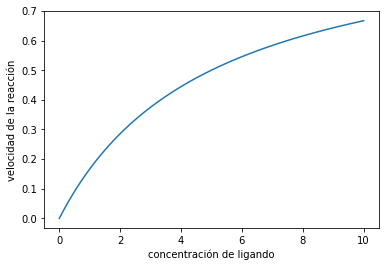

In [98]:
plt.plot(L, hill(L))
plt.xlabel("concentración de ligando")
plt.ylabel("velocidad de la reacción")

## Simulación interactiva para estudiar el coeficiente de Hill, $n$

In [99]:
def graficar_hill():
    L = np.linspace(0, 10, 101)
    plt.plot(L, hill(L))
    plt.xlabel("concentración de ligando")
    plt.ylabel("velocidad de la reacción")

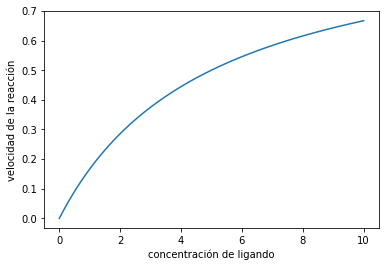

In [100]:
graficar_hill()

In [101]:
from ipywidgets import interact

def sim_hill(aslider = 1):
    global n
    n = aslider
    graficar_hill()
    
interact(sim_hill, aslider = (1, 20, 1))

interactive(children=(IntSlider(value=1, description='aslider', max=20, min=1), Output()), _dom_classes=('widg…

<function __main__.sim_hill>